OMNIFY TASK:
    You are requested to go through the dataset, and deliver the following:
1. Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.
2. Which is the most profitable channel
3. Which category/keyword is the most profitable
4. Look for insights by analyzing data points on time series graphs
5. Analyse the Impact of geography

### 1.Importing the Necessary Libraries

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
%matplotlib inline
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Loading the dataset

In [2]:
Google_Ads = pd.read_excel('Omnify-Analyst-Intership-Task.xlsx',0)
Google_Ads.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


### 3.Data Understanding

In [3]:
Google_Ads.shape

(418, 14)

In [4]:
Google_Ads.dtypes

Week              datetime64[ns]
Campaign                  object
Ad group                  object
Keyword type              object
Search Keyword            object
Currency                  object
Clicks                     int64
Impressions                int64
Cost ($)                 float64
Leads                      int64
Prospects                  int64
Payment ($)               object
Payment Date      datetime64[ns]
Country                   object
dtype: object

### Missing Value Detection and Treatment!

* Blank Values
* Null Values
* Nan
* Some continous column have 0's  to indicate the missing values

In [5]:
#Check for missing values in each attributes
Google_Ads.isna().any()

Week              False
Campaign          False
Ad group          False
Keyword type      False
Search Keyword     True
Currency          False
Clicks            False
Impressions       False
Cost ($)          False
Leads             False
Prospects         False
Payment ($)        True
Payment Date       True
Country           False
dtype: bool

In [6]:
#Knowing of How many missing values in each attribute
Google_Ads.isna().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64

In [7]:
#Calculating the percentage of missing values in each attribute
Google_Ads.isna().sum()/Google_Ads.shape[0] *100

Week               0.000000
Campaign           0.000000
Ad group           0.000000
Keyword type       0.000000
Search Keyword     1.435407
Currency           0.000000
Clicks             0.000000
Impressions        0.000000
Cost ($)           0.000000
Leads              0.000000
Prospects          0.000000
Payment ($)       98.086124
Payment Date      98.086124
Country            0.000000
dtype: float64

In [8]:
Google_Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      object        
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memo

In [9]:
Google_Ads.describe()

,Clicks,Impressions,Cost ($),Leads,Prospects
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.925837,16.662679,6.671483,0.028708,0.050239
std,1.900840,46.743636,14.253019,0.167185,0.285312
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,12.000000,6.800000,0.000000,0.000000
max,12.000000,357.000000,92.090000,1.000000,3.000000


In [10]:
Google_Ads.describe(include=['object'])

,Campaign,Ad group,Keyword type,Search Keyword,Currency,Payment ($),Country
count,418,418,418,412,418,8,418
unique,15,27,3,20,1,4,1
top,EK_Generic_Swimming,Reservation_Management_System_Phrase,Exact,reservation management system,USD,$980,USA
freq,97,91,184,90,418,3,418


### From Descripton of data we can able to see,

* <h4>Week: </h4> The data spans from January 25, 2021, to May 3, 2021, covering a total of 16 weeks.
* <h4>Campaign:</h4> The Campaign shows that the name of the advertising Campaign.
* <h4>Ad group:</h4> There are multiple ad groups related to different types of software solutions like swimming pool reservation, yoga studio booking, and pilates studio management. 
* <h4>Search Keyword type:</h4> The ad groups are further divided into exact and broad match keyword types in this Column.
* <h4>Currency:</h4> This column shows that the financial transaction(USD  US Dollar in thus case)
* <h4>Clicks:</h4> It gives the count of clicks in our ad
* <h4>Impressions:</h4> The total number of times the ad was shown to users.
* <h4>Cost($):</h4> The total cost incurred for running the ads.

* <h4>Leads:</h4> The number of potential customer contacts generated through the ads.
* <h4>Prospects:</h4> The number of potential customers that showed interest in the product/service.
* <h4>Payment ($):</h4> The amount received as payment (if any) related to the campaign.
* <h4>Payment Date:</h4> The date when the payment was received.
* <h4>Country:</h4> The country where the campaign was targeted (USA in this case).


In [11]:
# Convert Paymnet($) column into numerical values by removing the '$' and commas symbol
Google_Ads['Payment ($)'] = Google_Ads['Payment ($)'].str.replace(r'[$,]','')

In [12]:
#Convert the Payment ($) object data type into float 
Google_Ads['Payment ($)'] = Google_Ads['Payment ($)'].replace(np.nan,0).astype('float')

In [13]:
Google_Ads.dtypes

Week              datetime64[ns]
Campaign                  object
Ad group                  object
Keyword type              object
Search Keyword            object
Currency                  object
Clicks                     int64
Impressions                int64
Cost ($)                 float64
Leads                      int64
Prospects                  int64
Payment ($)              float64
Payment Date      datetime64[ns]
Country                   object
dtype: object

In [14]:
#Calculate the Return Percentage
Google_Ads['Return Percentage (%)'] = (Google_Ads['Payment ($)']/Google_Ads['Cost ($)']) * 100

In [15]:
Google_Ads.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,Return Percentage (%)
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA,2556.744065
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaT,USA,0.000000
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA,2632.395302
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,0.0,NaT,USA,0.000000
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,0.0,NaT,USA,0.000000


In [20]:
Google_Ads['Campaign'].unique()


array(['EK_Generic_Swimming', 'EK_Generic_Quad-Tok_Yoga',
       'EK_Generic_Swimming_UK', 'EK_Generic_Swimming_Canada',
       'EK_Generic_Tri-Tok_Reservation',
       'EK_Generic_Quad-Tok_Yoga_Singapore',
       'EK_Generic_Tri-Tok_Reservation_Canada',
       'EK_Generic_Tri-Tok_Reservation_UK',
       'EK_Generic_Tri-Tok_Reservation_UAE',
       'EK_Generic_Tri-Tok_Reservation_Singapore',
       'EK_Generic_Quad-Tok_Pilates', 'EK_Generic_Tri-Tok_Yoga_Singapore',
       'EK_Generic_Tri-Tok_Pilates', 'EK_Generic_Tri-Tok_Yoga',
       'EK_Generic_Swimming_Singapore'], dtype=object)

In [32]:
Campaign_Counts = Google_Ads['Campaign'].value_counts()
Campaign_Counts

EK_Generic_Swimming                         97
EK_Generic_Quad-Tok_Yoga                    47
EK_Generic_Tri-Tok_Reservation              45
EK_Generic_Swimming_UK                      27
EK_Generic_Tri-Tok_Reservation_UK           27
EK_Generic_Tri-Tok_Reservation_UAE          25
EK_Generic_Tri-Tok_Reservation_Canada       24
EK_Generic_Tri-Tok_Yoga                     23
EK_Generic_Tri-Tok_Pilates                  22
EK_Generic_Swimming_Canada                  20
EK_Generic_Quad-Tok_Pilates                 20
EK_Generic_Tri-Tok_Reservation_Singapore    19
EK_Generic_Swimming_Singapore               11
EK_Generic_Quad-Tok_Yoga_Singapore           9
EK_Generic_Tri-Tok_Yoga_Singapore            2
Name: Campaign, dtype: int64

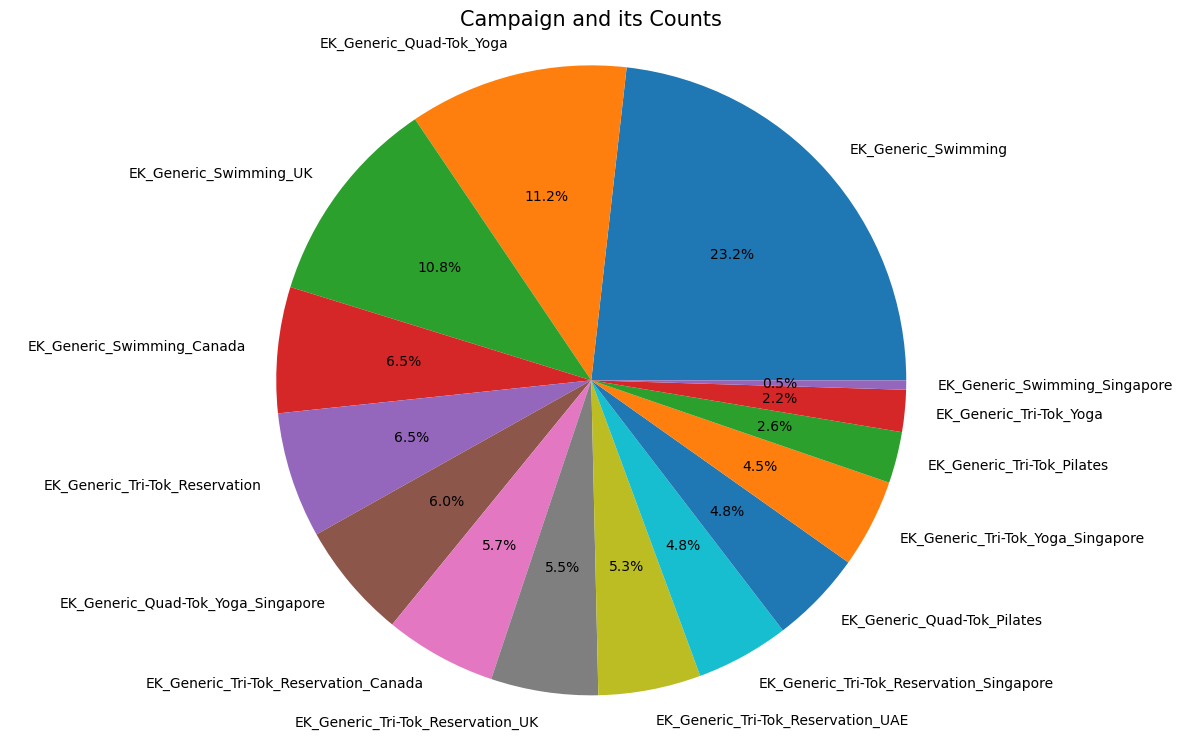

In [67]:
label = ['EK_Generic_Swimming', 'EK_Generic_Quad-Tok_Yoga',
       'EK_Generic_Swimming_UK', 'EK_Generic_Swimming_Canada',
       'EK_Generic_Tri-Tok_Reservation',
       'EK_Generic_Quad-Tok_Yoga_Singapore',
       'EK_Generic_Tri-Tok_Reservation_Canada',
       'EK_Generic_Tri-Tok_Reservation_UK',
       'EK_Generic_Tri-Tok_Reservation_UAE',
       'EK_Generic_Tri-Tok_Reservation_Singapore',
       'EK_Generic_Quad-Tok_Pilates', 'EK_Generic_Tri-Tok_Yoga_Singapore',
       'EK_Generic_Tri-Tok_Pilates', 'EK_Generic_Tri-Tok_Yoga',
       'EK_Generic_Swimming_Singapore']
plt.figure(figsize=(15,9))
plt.pie(x=Campaign_Counts,labels=label,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Campaign and its Counts',fontsize=15)
plt.show()

## Q:1
1. Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.

In [75]:
Report = Google_Ads[['Week','Cost ($)','Payment ($)','Return Percentage (%)']]
Report

,Week,Cost ($),Payment ($),Return Percentage (%)
0,2021-01-25,38.33,980.0,2556.744065
1,2021-01-25,11.70,0.0,0.000000
2,2021-01-25,45.13,1188.0,2632.395302
3,2021-01-25,23.91,0.0,0.000000
4,2021-01-25,4.89,0.0,0.000000
...,...,...,...,...
413,2021-05-03,0.00,0.0,NaN
414,2021-05-03,0.00,0.0,NaN
415,2021-05-03,0.00,0.0,NaN
416,2021-05-03,0.00,0.0,NaN


In [139]:
# Prepare weekly report by Spend and Expenditure
Weekly_report = Report.groupby(by=Report['Week'])[['Cost ($)','Return Percentage (%)']].sum().reset_index()
Weekly_report

,Week,Cost ($),Return Percentage (%)
0,2021-01-25,154.79,5189.139367
1,2021-02-01,192.58,0.000000
2,2021-02-08,216.13,8132.780083
3,2021-02-15,235.30,11195.992486
4,2021-02-22,190.90,0.000000
5,2021-03-01,141.40,2318.977757
6,2021-03-08,258.20,0.000000
7,2021-03-15,184.36,0.000000
8,2021-03-22,308.73,4761.714855
9,2021-03-29,172.11,0.000000


In [259]:
# Prepare weekly report by Spend and Expenditure
Weekly_Report = Report.groupby(by=Report['Week'].dt.week)[['Cost ($)','Return Percentage (%)']].sum().reset_index()
Weekly_Report

,Week,Cost ($),Return Percentage (%)
0,4,154.79,5189.139367
1,5,192.58,0.000000
2,6,216.13,8132.780083
3,7,235.30,11195.992486
4,8,190.90,0.000000
5,9,141.40,2318.977757
6,10,258.20,0.000000
7,11,184.36,0.000000
8,12,308.73,4761.714855
9,13,172.11,0.000000


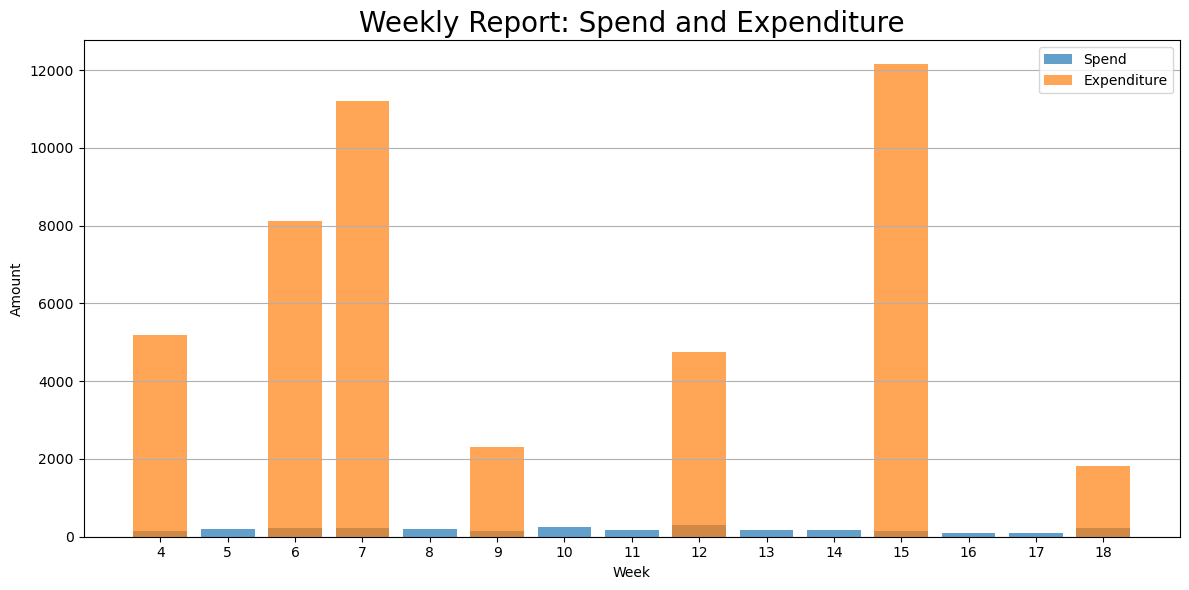

In [260]:
plt.figure(figsize=(12, 6))
plt.bar(Weekly_Report['Week'], Weekly_Report['Cost ($)'], label='Spend', alpha=0.7)
plt.bar(Weekly_Report['Week'], Weekly_Report['Return Percentage (%)'], label='Expenditure', alpha=0.7)
plt.xlabel('Week')
plt.ylabel('Amount')
plt.title('Weekly Report: Spend and Expenditure',fontsize=20)
plt.legend()
plt.xticks(Weekly_Report['Week'], rotation=0)  # Set week numbers as x-axis labels
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [141]:
# Prepare monthly report by Spend and Expenditure
Weekly_report['Month'] = Weekly_report['Week'].dt.to_period('M')  # Extract the month from the Week
monthly_report = Weekly_report.groupby(Weekly_report['Month'].dt.strftime('%B')).sum().reset_index()
df = monthly_report

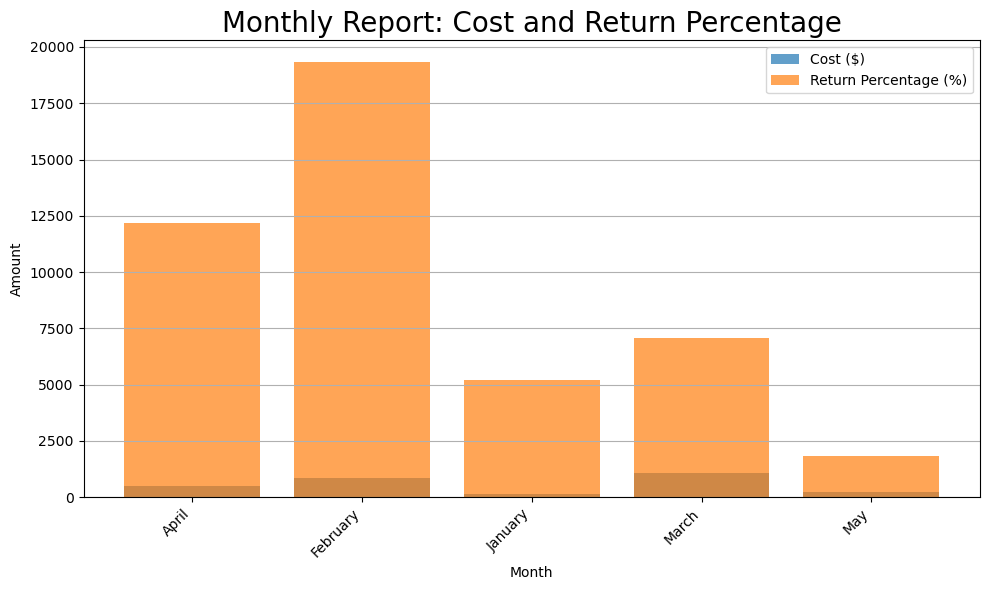

In [145]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size (width, height)

# Plot the 'Cost ($)' bars
plt.bar(df['Month'], df['Cost ($)'], label='Cost ($)', alpha=0.7)

# Plot the 'Return Percentage (%)' bars on the same plot
plt.bar(df['Month'], df['Return Percentage (%)'], label='Return Percentage (%)', alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Report: Cost and Return Percentage',fontsize=20)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

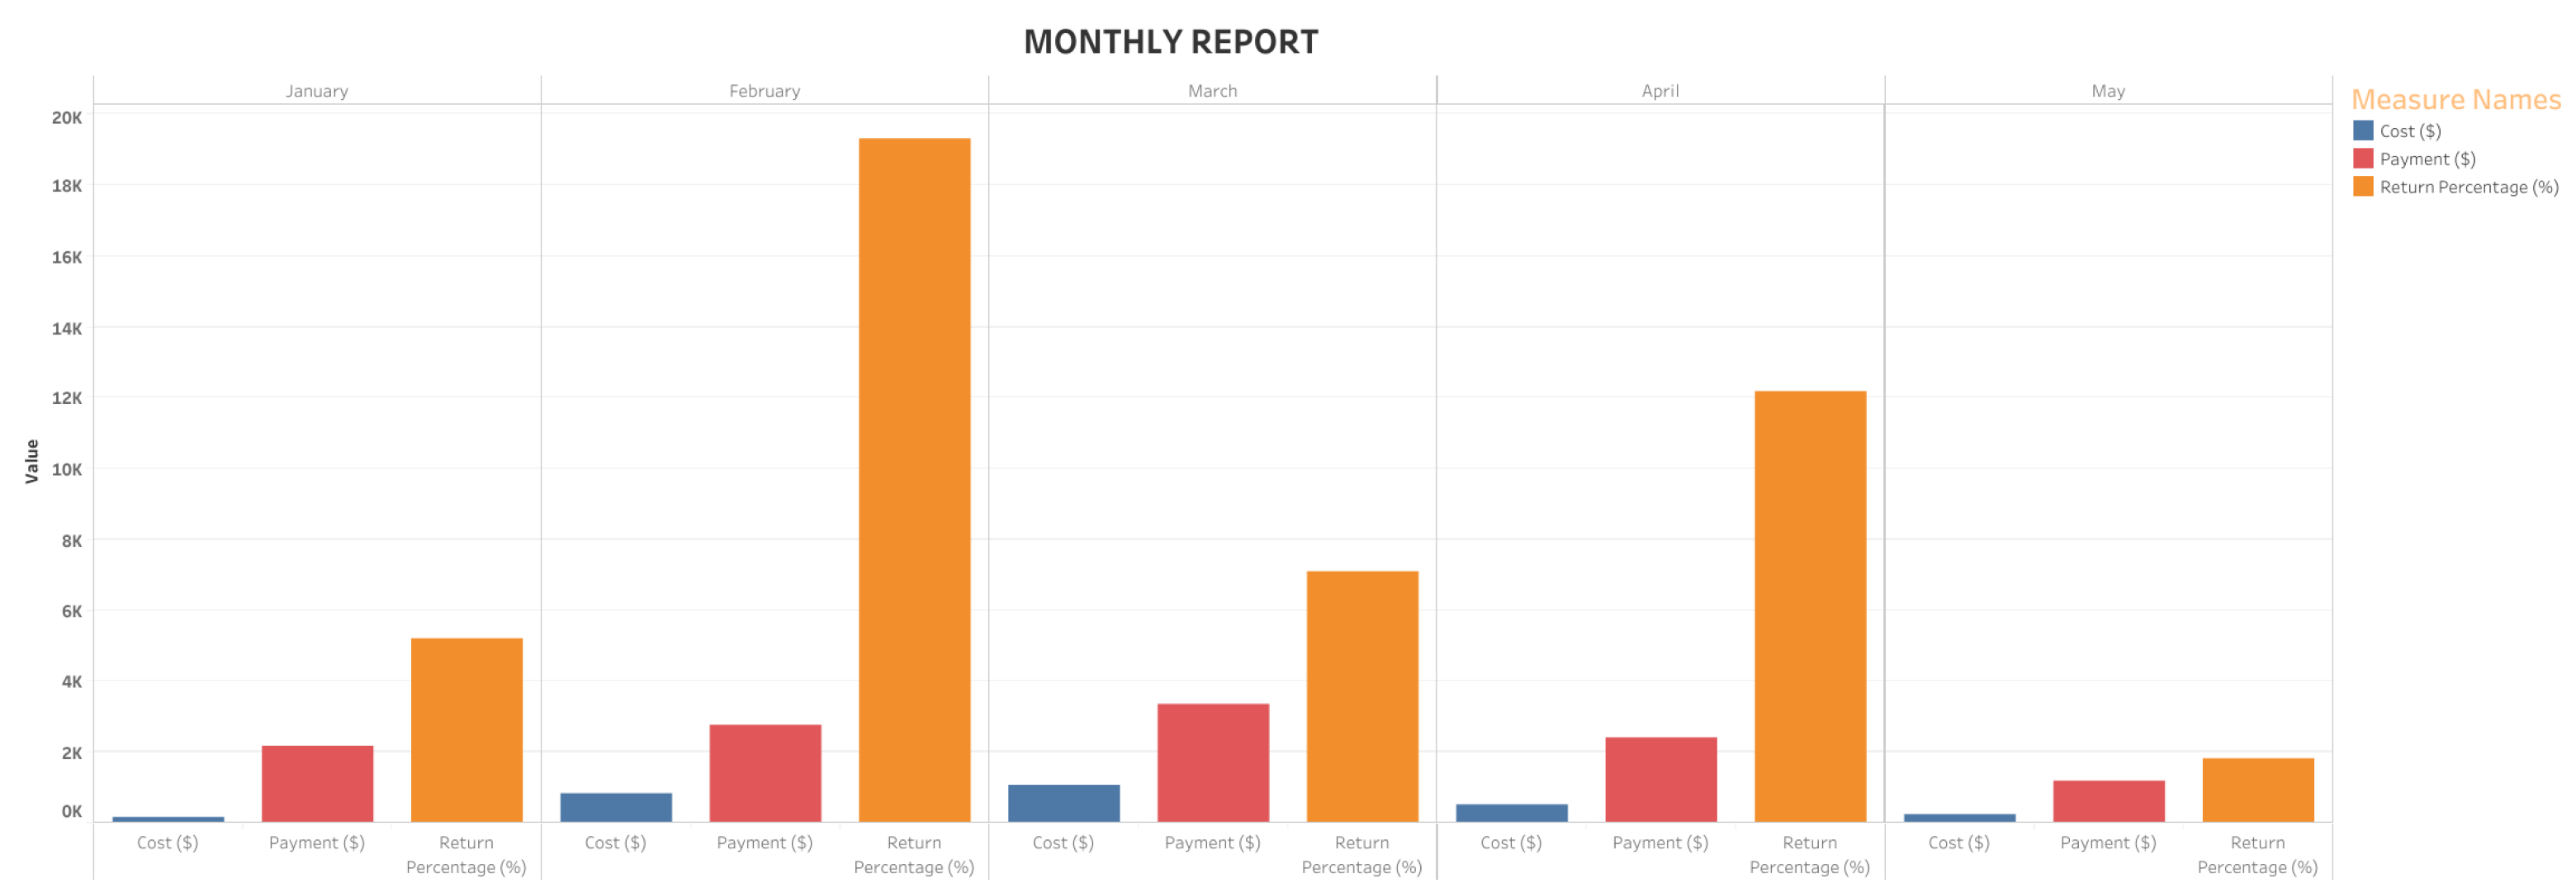

In [235]:
# Open the PNG image
image = Image.open("Sheet 1.png")

# Display the image
plt.figure(figsize=(40,25))
plt.imshow(image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

## Q2
### 2. Which is the most profitable channel

In [148]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [150]:
site_data = pd.read_excel('Omnify-Analyst-Intership-Task.xlsx',1)
site_data

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
0,Omnify,Coaching,2020-10-20 00:00:00,13.00,1.0,NaN,2.00,Capterra,UNITED STATES,NaN,NaN,NaT
1,Omnify,Dance Studio,2020-10-20 00:00:00,20.00,1.0,NaN,2.00,Capterra,UNITED KINGDOM,NaN,NaN,NaT
2,Omnify,Personal Trainer,2020-10-20 00:00:00,6.00,1.0,NaN,2.00,Capterra,SINGAPORE,NaN,NaN,NaT
3,Omnify,Scheduling,2020-10-20 00:00:00,59.00,1.0,NaN,2.00,GetApp,UNITED STATES,NaN,NaN,NaT
4,Omnify,Class Registration,2020-10-21 00:00:00,6.00,1.0,NaN,2.00,Capterra,AUSTRALIA,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
2086,Omnify,Class Registration,04-30-2021,10.00,1.0,NaN,10.75,Capterra,United States,NaN,NaN,NaT
2087,Omnify,Club Management,04-30-2021,1.00,1.0,NaN,12.25,Software Advice,United Kingdom,NaN,NaN,NaT
2088,Omnify,Coaching,04-30-2021,14.67,3.0,NaN,6.00,Capterra,United States,NaN,NaN,NaT
2089,Omnify,Dance Studio,04-30-2021,8.00,1.0,NaN,11.50,Capterra,United Kingdom,NaN,NaN,NaT


In [151]:
site_data.shape

(2091, 12)

In [152]:
site_data.dtypes

Product Name                object
Categories                  object
Date of Report              object
Average Position           float64
Clicks                     float64
Leads                      float64
Money Spent ($)            float64
Channel                     object
Location                    object
Prospects                  float64
Paid                        object
Paid Date           datetime64[ns]
dtype: object

In [153]:
#Knowing of How many missing values in each attribute
site_data.isna().sum()

Product Name           0
Categories             0
Date of Report         0
Average Position       1
Clicks                 1
Leads               1928
Money Spent ($)        2
Channel                0
Location               0
Prospects           2025
Paid                2077
Paid Date           2078
dtype: int64

In [154]:
#Calculating the percentage of missing values in each attribute
site_data.isna().sum()/site_data.shape[0] *100

Product Name         0.000000
Categories           0.000000
Date of Report       0.000000
Average Position     0.047824
Clicks               0.047824
Leads               92.204687
Money Spent ($)      0.095648
Channel              0.000000
Location             0.000000
Prospects           96.843615
Paid                99.330464
Paid Date           99.378288
dtype: float64

In [155]:
site_data.describe()

,Average Position,Clicks,Leads,Money Spent ($),Prospects
count,2090.000000,2090.000000,163.000000,2089.000000,66.000000
mean,10.731464,1.663636,1.141104,12.074318,1.030303
std,11.219817,2.798869,0.542938,39.172291,0.172733
min,0.000000,1.000000,1.000000,2.000000,1.000000
25%,3.000000,1.000000,1.000000,2.000000,1.000000
50%,8.000000,1.000000,1.000000,7.250000,1.000000
75%,13.000000,2.000000,1.000000,12.250000,1.000000
max,74.000000,80.000000,6.000000,1460.000000,2.000000


In [156]:
site_data.describe(include='object')

,Product Name,Categories,Date of Report,Channel,Location,Paid
count,2091,2091,2091,2091,2091,14
unique,1,19,190,3,14,11
top,Omnify,Reservations,2021-02-04 00:00:00,Capterra,UNITED STATES,$980
freq,2091,458,28,1211,902,2


In [157]:
#To Find the most Profitable channel
site_data['Channel'].value_counts()

Capterra           1211
GetApp              825
Software Advice      55
Name: Channel, dtype: int64

In [160]:
# Convert Paid($) column into numerical values by removing the '$' and commas symbol
site_data['Paid'] = site_data['Paid'].str.replace(r'[$,]','')

In [161]:
# To Replace the null values to 0
site_data['Paid'] = site_data['Paid'].replace(np.nan,0).astype('float')

In [167]:
#To Find the Profit of channels (Profit = Selling Price- Cost Price)
site_data['Profit'] = site_data['Paid'] - site_data['Money Spent ($)']

In [170]:
profit_channel = site_data.groupby(by=['Channel'])['Profit'].sum().reset_index(name='Profit')
profit_channel

,Channel,Profit
0,Capterra,-4659.85
1,GetApp,-3661.90
2,Software Advice,1482.50


### From the Above analysis,The Most Profitble Channel is Software Advice with profit of 1482.50$

## Q3 
### Which category/keyword is the most profitable

In [258]:
site_data['Categories'].unique()

array(['Coaching', 'Dance Studio', 'Personal Trainer', 'Scheduling',
       'Class Registration', 'Fitness', 'Swim School', 'Yoga Studio',
       'Camp Management', 'Music School', 'Reservations',
       'Club Management', 'Gymnastics', 'Venue Management',
       'Membership Management', 'Parks and Recreation', 'Spa',
       'Martial Arts', 'Pilates Studio'], dtype=object)

In [256]:
profit_categories = site_data.groupby('Categories')['Profit'].sum().reset_index(name='profit').sort_values('profit',ascending=False).head(1)
profit_categories

,Categories,profit
10,Parks and Recreation,3574.85


### The Most Profitble Category is Parks and Recreation with profit of 3574.85$

## Q4
### Look for insights by analyzing data points on time series graphs

In [182]:
site_data.head()

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date,Profit
0,Omnify,Coaching,2020-10-20 00:00:00,13.0,1.0,NaN,2.0,Capterra,UNITED STATES,NaN,0.0,NaT,-2.0
1,Omnify,Dance Studio,2020-10-20 00:00:00,20.0,1.0,NaN,2.0,Capterra,UNITED KINGDOM,NaN,0.0,NaT,-2.0
2,Omnify,Personal Trainer,2020-10-20 00:00:00,6.0,1.0,NaN,2.0,Capterra,SINGAPORE,NaN,0.0,NaT,-2.0
3,Omnify,Scheduling,2020-10-20 00:00:00,59.0,1.0,NaN,2.0,GetApp,UNITED STATES,NaN,0.0,NaT,-2.0
4,Omnify,Class Registration,2020-10-21 00:00:00,6.0,1.0,NaN,2.0,Capterra,AUSTRALIA,NaN,0.0,NaT,-2.0


In [183]:
site_data.shape

(2091, 13)

In [180]:
# Count of NaN values in the dataset 
site_data.isna().sum()

Product Name           0
Categories             0
Date of Report         0
Average Position       1
Clicks                 1
Leads               1928
Money Spent ($)        2
Channel                0
Location               0
Prospects           2025
Paid                   0
Paid Date           2078
Profit                 2
dtype: int64

In [184]:
site_data.describe()

,Average Position,Clicks,Leads,Money Spent ($),Prospects,Paid,Profit
count,2090.000000,2090.000000,163.000000,2089.000000,66.000000,2091.000000,2089.000000
mean,10.731464,1.663636,1.141104,12.074318,1.030303,8.791966,-3.273935
std,11.219817,2.798869,0.542938,39.172291,0.172733,139.638259,144.389728
min,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,-1460.000000
25%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,-12.250000
50%,8.000000,1.000000,1.000000,7.250000,1.000000,0.000000,-6.500000
75%,13.000000,2.000000,1.000000,12.250000,1.000000,0.000000,-2.000000
max,74.000000,80.000000,6.000000,1460.000000,2.000000,4000.000000,3998.000000


In [185]:
site_data.median()

Average Position    8.00
Clicks              1.00
Leads               1.00
Money Spent ($)     7.25
Prospects           1.00
Paid                0.00
Profit             -6.50
dtype: float64

In [186]:
# Imputing missing values with their respective columns median
site_data.fillna(site_data.median(),inplace=True)

In [191]:
corr = site_data.corr()
corr

,Average Position,Clicks,Leads,Money Spent ($),Prospects,Paid,Profit
Average Position,1.000000,-0.078739,-0.015703,-0.091218,-0.006153,-0.000867,0.023905
Clicks,-0.078739,1.000000,0.500101,0.936843,0.003724,0.031460,-0.223725
Leads,-0.015703,0.500101,1.000000,0.379523,0.196433,0.033749,-0.070310
Money Spent ($),-0.091218,0.936843,0.379523,1.000000,0.002810,0.018602,-0.253300
Prospects,-0.006153,0.003724,0.196433,0.002810,1.000000,0.058891,0.056218
Paid,-0.000867,0.031460,0.033749,0.018602,0.058891,1.000000,0.962509
Profit,0.023905,-0.223725,-0.070310,-0.253300,0.056218,0.962509,1.000000


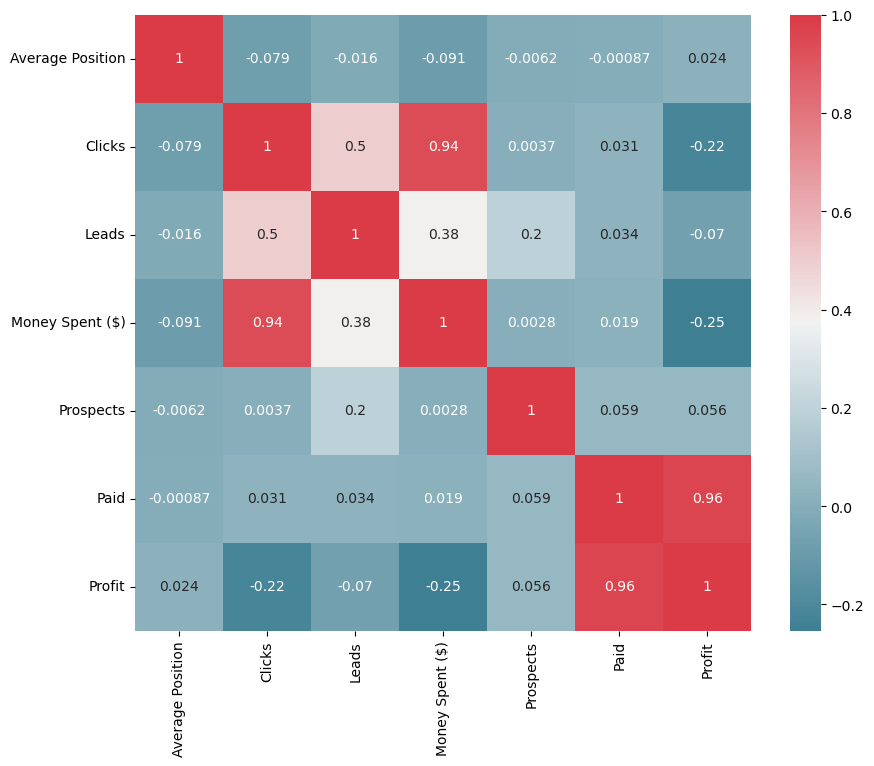

In [206]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),
             square=True,annot=True)
plt.show()

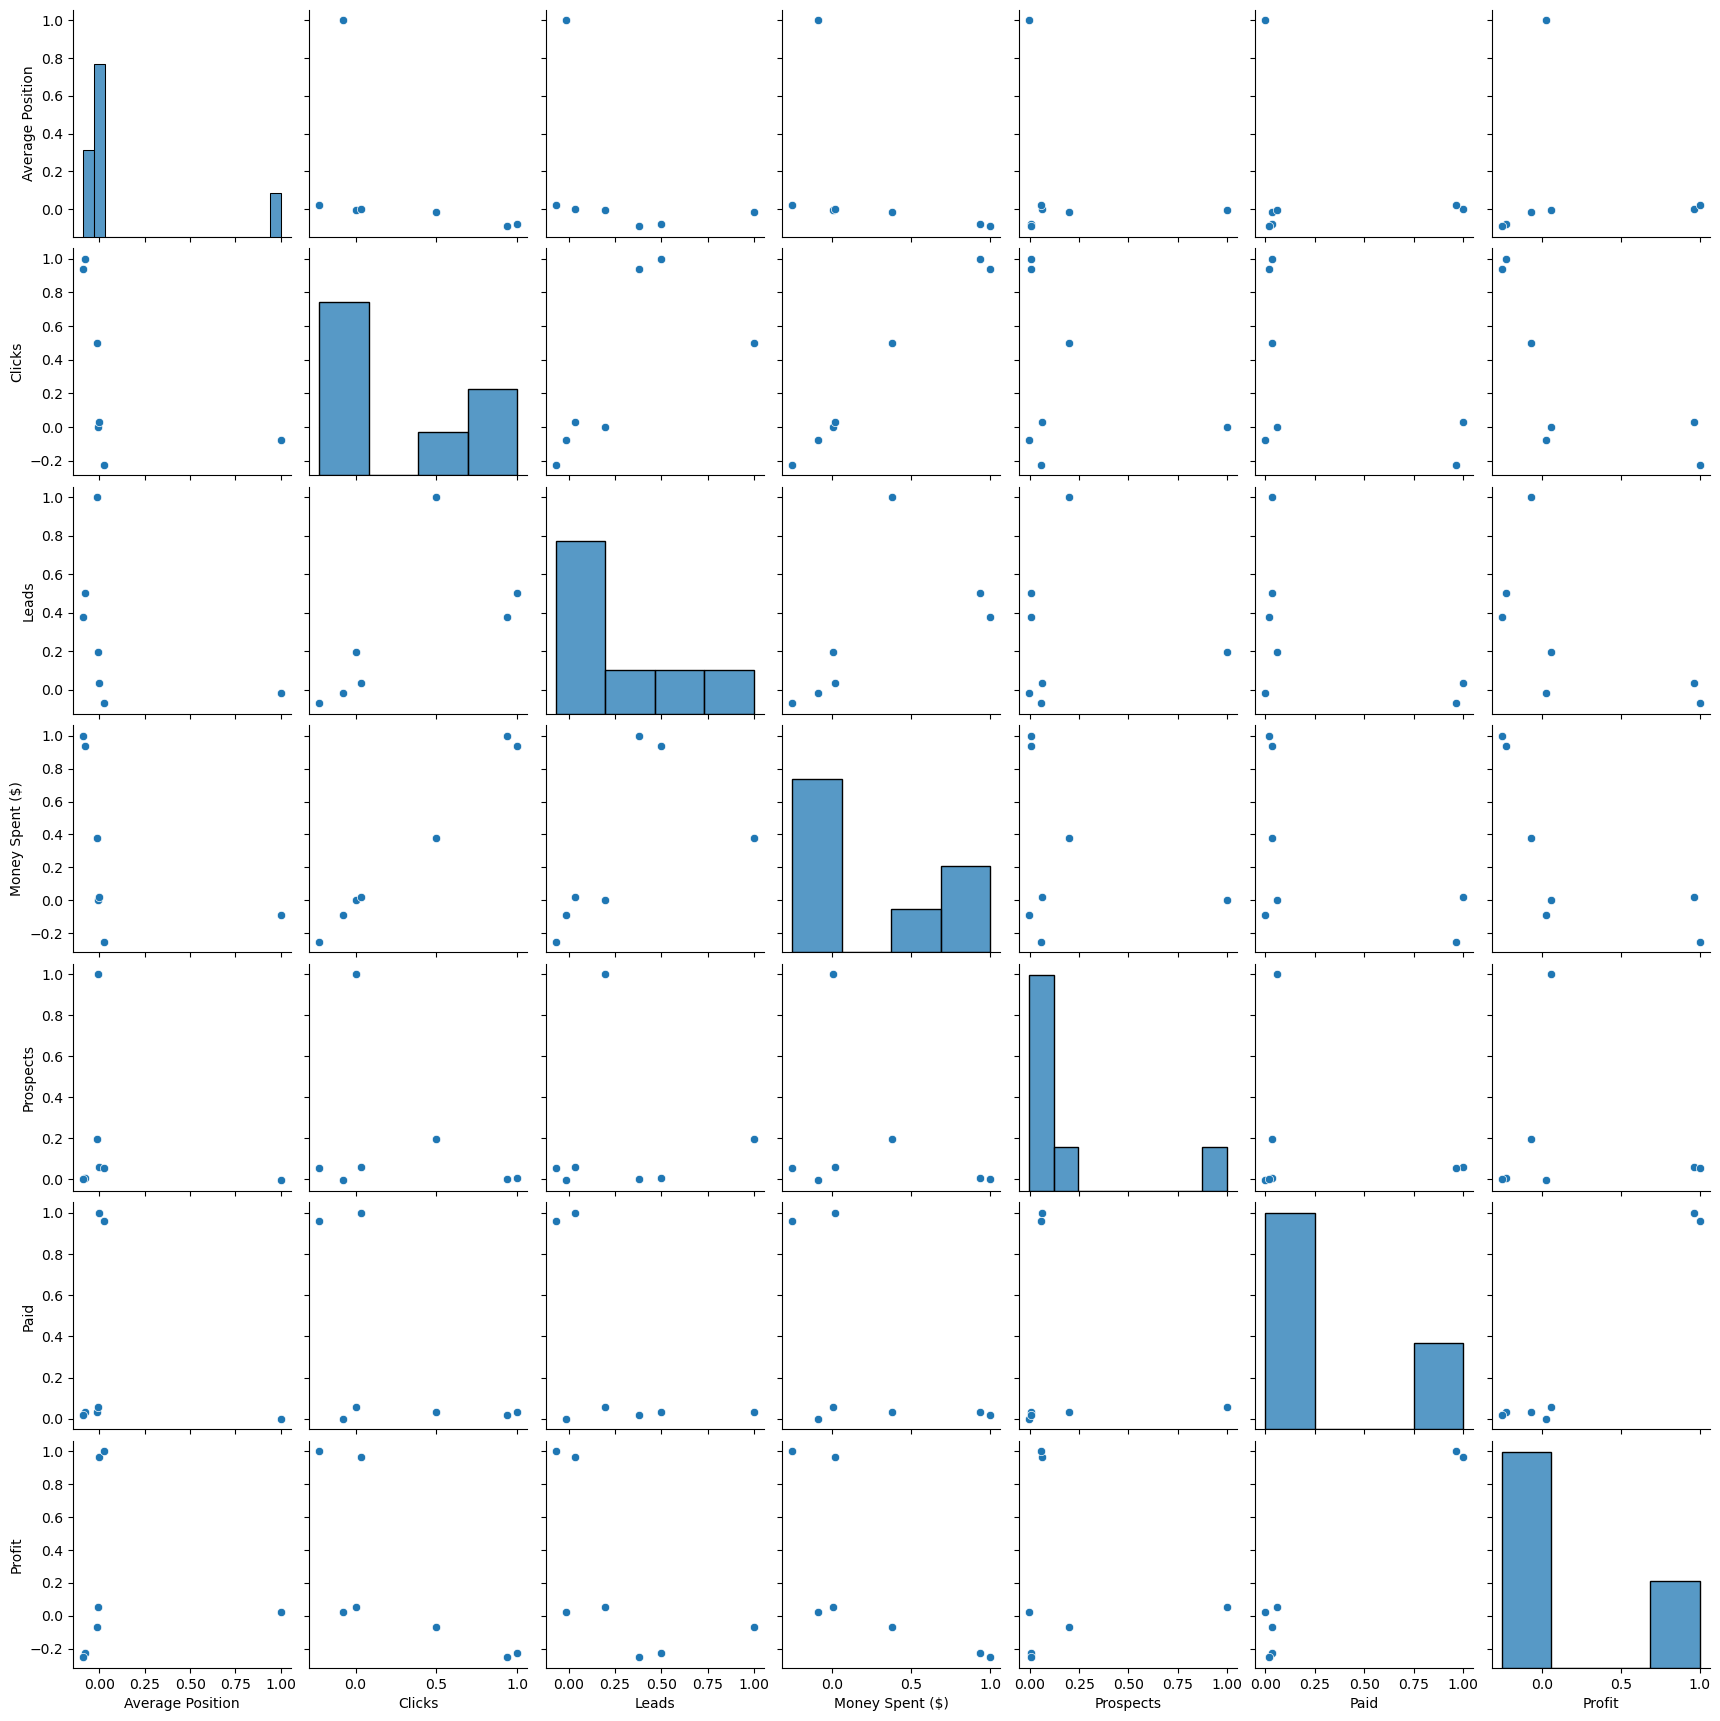

In [209]:
sns.pairplot(corr)
plt.show()

## Q5.
### Analyse the Impact of geography

In [212]:
site_data['Location']= site_data['Location'].str.upper()

In [240]:
site_data.groupby('Location')['Money Spent ($)'].sum().to_frame().sort_values(by='Money Spent ($)',ascending=False)

,Money Spent ($)
Location,
UNITED STATES,15942.40
UNITED KINGDOM,4351.10
SINGAPORE,2243.25
CANADA,1369.75
AUSTRALIA,1224.25
USA,77.75
US,11.25
UK,10.75
MIDDLE EAST,7.25


<h3> From Above analysis, Unites states spend more money compared to other other countries </h3>

In [242]:
site_data.groupby('Location')['Paid'].sum().to_frame().sort_values(by='Paid',ascending=False)

,Paid
Location,
UNITED STATES,10848.0
UNITED KINGDOM,4768.0
CANADA,2768.0
AUSTRALIA,0.0
MIDDLE EAST,0.0
SINGAPORE,0.0
UK,0.0
US,0.0
USA,0.0


<h3> From Above analysis, Unites states is highly paid area compared to other countries </h3>

In [243]:
site_data.groupby('Location')['Profit'].sum().to_frame().sort_values(by='Profit',ascending=False)

,Profit
Location,
CANADA,1398.25
UNITED KINGDOM,416.90
MIDDLE EAST,-6.50
UK,-10.75
US,-11.25
USA,-77.75
AUSTRALIA,-1224.25
SINGAPORE,-2243.25
UNITED STATES,-5093.65


<h3> From Analysis, Highest Profit earning country is Canada.